In [4]:
import numpy as np
from sklearn.cluster import DBSCAN

In [48]:
import matplotlib.pyplot as plt
X= np.array([ [1,2], [2,2], [7,6], [8,7], [2,3],[25,8] ])

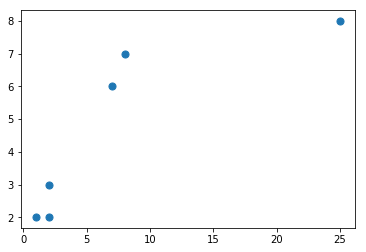

In [49]:
%matplotlib inline
plt.scatter(X[:, 0], X[:, 1], s = 50);
plt.show()

In [54]:
db = DBSCAN(eps=6, min_samples=2)

In [55]:
db.fit(X)

DBSCAN(algorithm='auto', eps=6, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=2, n_jobs=None, p=None)

In [56]:
print(db.labels_)

[ 0  0  0  0  0 -1]


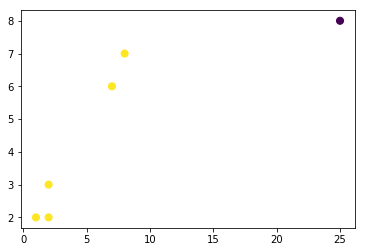

In [57]:
plt.scatter(X[:, 0], X[:, 1], c=db.labels_, s = 50, cmap = 'viridis')

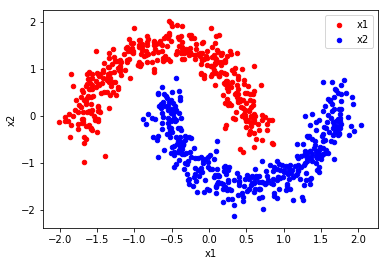

In [58]:
from sklearn.datasets import make_moons
from matplotlib import pyplot
from pandas import DataFrame
from sklearn.preprocessing import StandardScaler
# Generate test data using using make_moons()
X, y = make_moons(n_samples=750, shuffle=True, noise=0.11,random_state=42)
X = StandardScaler().fit_transform(X)
# Split and organize the data
df = DataFrame(dict(x1=X[:,0], x2=X[:,1], label=y))
grouped = df.groupby('label')
# And plot it
colors = ["red", "blue"]
labels = ["x1", "x2"]
fig, ax = pyplot.subplots()
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x1', y='x2',label=labels[key], color=colors[key])
pyplot.show()

In [61]:
from sklearn.cluster import KMeans
km= KMeans(n_clusters = 9)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

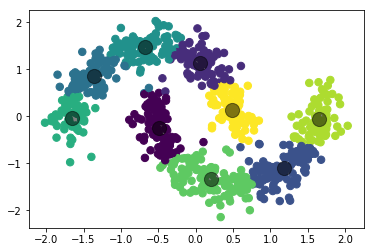

In [62]:
y_kmeans = km.predict(X)
plt.scatter(X[:, 0], X[:, 1], c = y_kmeans, s = 55, cmap = 'viridis')
centers = km.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c = 'black', s = 200, alpha = 0.5);
plt.show()

2 Hierarchical Clustering

In [63]:
import numpy as np
X = np.array([[5,3],[10,15],[15,12],[24,10],[30,30],
[85,70],[71,80],[60,78],[70,55],[80,91],])

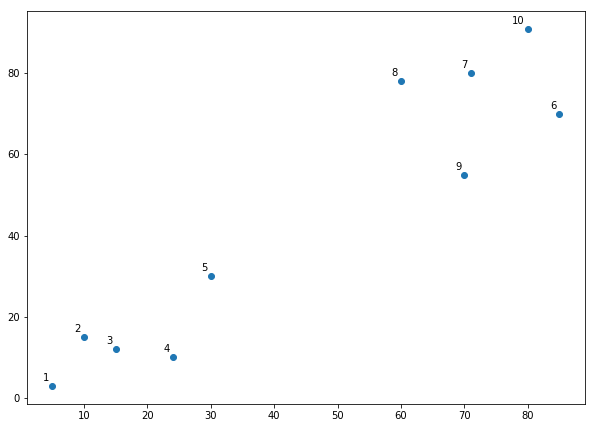

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline
labels = range(1, 11)
plt.figure(figsize=(10, 7))
plt.subplots_adjust(bottom=0.1)
plt.scatter(X[:,0],X[:,1], label='True Position')
for label, x, y in zip(labels, X[:, 0], X[:, 1]):
    plt.annotate(label,xy=(x, y), xytext=(-3, 3),
    textcoords='offset points', ha='right', va='bottom')
plt.show()

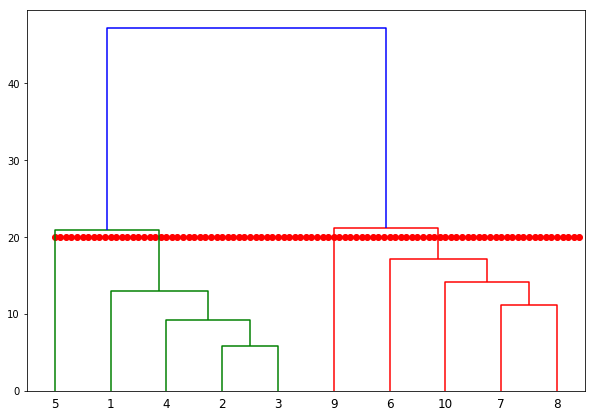

In [73]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
linked = linkage(X, 'single')
labelList = range(1, 11)
plt.figure(figsize=(10, 7))
dendrogram(linked,orientation='top',labels=labelList,
    distance_sort='descending',show_leaf_counts=True)
hline = np.array([[x,20] for x in range(5,100)])
plt.scatter(hline[:,0], hline[:,1], color='red')
plt.show()

In [75]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=4,
    affinity='euclidean', linkage='ward')
cluster.fit_predict(X)

array([1, 1, 1, 1, 3, 2, 0, 0, 2, 0])

In [76]:
print(cluster.labels_)

[1 1 1 1 3 2 0 0 2 0]


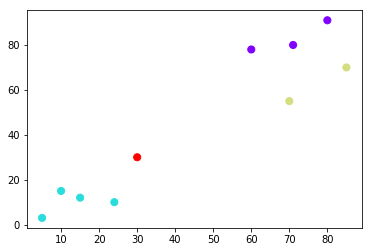

In [80]:
plt.scatter(X[:, 0], X[:, 1], c=cluster.labels_, s = 50, cmap = 'rainbow')

In [123]:
import pandas as pa
dataset=pa.read_csv('https://www.labri.fr/~zemmari/datasets/shopping-data.csv')

In [124]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [125]:
dataset.shape

(200, 5)

In [126]:
data = dataset[['Annual Income (k$)','Spending Score (1-100)']]
print(data.shape)
data.head()

(200, 2)


,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


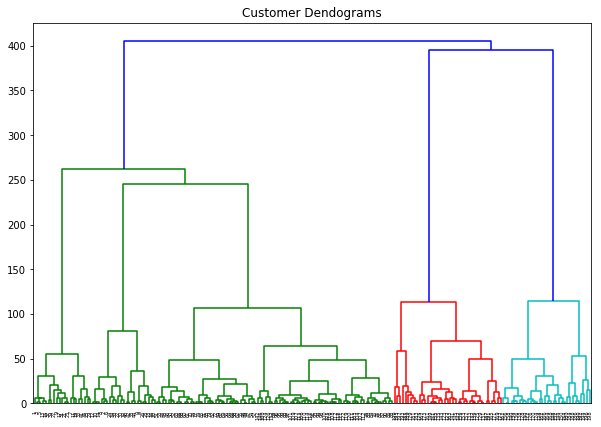

In [127]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='ward'))

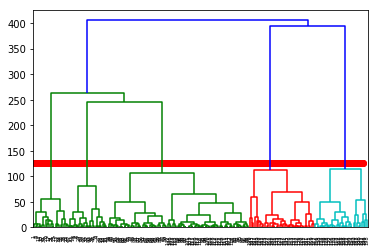

In [142]:
dend = shc.dendrogram(shc.linkage(data, method='ward'))
hline = np.array([[x,125] for x in range(5,1970)])
plt.scatter(hline[:,0], hline[:,1], color='red')

In [146]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=5,affinity='euclidean', linkage='ward')
cluster.fit_predict(data)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [147]:
print(cluster.labels_)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 1 2
 0 2 0 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


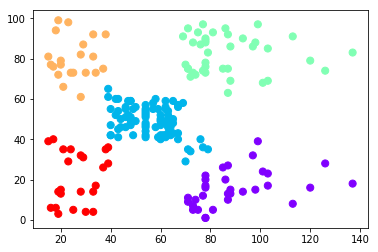

In [148]:
datav = data.values
plt.scatter(datav[:, 0], datav[:, 1], c=cluster.labels_, s = 50, cmap = 'rainbow')

We can see the data points in the form of five clusters. The data points in the bottom right belong to the customers with high salaries but low spending. These are the customers that spend their money carefully. Similarly, the customers at top right (green data points), these are the customers with high salaries and high spending. These are the type of customers that companies target. The customers in the middle (blue data points) are the ones with average income and average salaries. The highest numbers of customers belong to this category. Companies can also target these customers given the fact that they are in huge numbers, etc.